In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Elon_musk.csv', encoding='Latin1')

In [3]:
df.drop(['Unnamed: 0'],inplace=True,axis=1)

In [4]:
df.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [5]:
# df['label'] = df['Text'].apply(lambda x: remove_punctuation(x))

In [6]:
import string
def remove_punctuation(text):
    return ''.join([i for i in text if i not in string.punctuation])

In [7]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
df['Text_clean'] = df['Text'].apply(lambda x: remove_punctuation(x))
df.head()

,Text,Text_clean
0,@kunalb11 Im an alien,kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,IDAACarmack Ray tracing on Cyberpunk with HDR ...
2,@joerogan @Spotify Great interview!,joerogan Spotify Great interview
3,@gtera27 Doge is underestimated,gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China for amazin...


In [9]:
import re

In [10]:
def textsplit(text):
    return text.split(' ')
df['Text_clean'] = df['Text_clean'].apply(lambda x : textsplit(x))
df.head()

,Text,Text_clean
0,@kunalb11 Im an alien,"[kunalb11, Im, an, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"[IDAACarmack, Ray, tracing, on, Cyberpunk, wit..."
2,@joerogan @Spotify Great interview!,"[joerogan, Spotify, Great, interview]"
3,@gtera27 Doge is underestimated,"[gtera27, Doge, is, underestimated]"
4,@teslacn Congratulations Tesla China for amazi...,"[teslacn, Congratulations, Tesla, China, for, ..."


In [11]:
import nltk
from nltk.stem import WordNetLemmatizer


In [12]:
wnl = WordNetLemmatizer()

In [13]:
def lemmatizer(text):
    return[wnl.lemmatize(w, pos='v') for w in text]


In [14]:
df['Text_clean'] = df['Text_clean'].apply(lambda x: lemmatizer(x))

In [15]:
df.head(10)

,Text,Text_clean
0,@kunalb11 Im an alien,"[kunalb11, Im, an, alien]"
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,"[IDAACarmack, Ray, trace, on, Cyberpunk, with,..."
2,@joerogan @Spotify Great interview!,"[joerogan, Spotify, Great, interview]"
3,@gtera27 Doge is underestimated,"[gtera27, Doge, be, underestimate]"
4,@teslacn Congratulations Tesla China for amazi...,"[teslacn, Congratulations, Tesla, China, for, ..."
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,"[Happy, New, Year, of, the, Ox, httpstco9WFKMY..."
6,"Frodo was the underdoge,\nAll thought he would...","[Frodo, be, the, underdoge\nAll, think, he, wo..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),"[OwenSparks, flcnhvy, anonyx10, Haha, thank, ]"
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,"[flcnhvy, anonyx10, Indeed, Tweets, definitely..."
9,The most entertaining outcome is the most likely,"[The, most, entertain, outcome, be, the, most,..."


In [16]:
def join_words (list_words):
    return ' '.join(words for words in list_words)


In [17]:
df['Text_clean'] = df['Text_clean'].apply(lambda x: join_words(x))

In [18]:
df.head()

,Text,Text_clean
0,@kunalb11 Im an alien,kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,IDAACarmack Ray trace on Cyberpunk with HDR be...
2,@joerogan @Spotify Great interview!,joerogan Spotify Great interview
3,@gtera27 Doge is underestimated,gtera27 Doge be underestimate
4,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China for amaze ...


In [19]:
all_words = ' '.join([word for word in df['Text_clean']])

In [20]:
all_words

'kunalb11 I\x92m an alien IDAACarmack Ray trace on Cyberpunk with HDR be nextlevel Have you try it joerogan Spotify Great interview gtera27 Doge be underestimate teslacn Congratulations Tesla China for amaze execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo be the underdoge\nAll think he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thank  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertain outcome be the most likely GiveDirectly Just send some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It\x92s get real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely have issue but the sentence seem a bite high freewalletorg Thanks for fix freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This be true power haha httpstcoFc9uhQSd7O freewalletorg Any crypto walle

In [21]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [22]:
tokenized_words

['kunalb11',
 'I\x92m',
 'an',
 'alien',
 'IDAACarmack',
 'Ray',
 'trace',
 'on',
 'Cyberpunk',
 'with',
 'HDR',
 'be',
 'nextlevel',
 'Have',
 'you',
 'try',
 'it',
 'joerogan',
 'Spotify',
 'Great',
 'interview',
 'gtera27',
 'Doge',
 'be',
 'underestimate',
 'teslacn',
 'Congratulations',
 'Tesla',
 'China',
 'for',
 'amaze',
 'execution',
 'last',
 'year',
 'Now',
 'on',
 'to',
 'the',
 'next',
 'for',
 'even',
 'more',
 'Happy',
 'New',
 'Year',
 'of',
 'the',
 'Ox',
 'httpstco9WFKMYu2oj',
 'Frodo',
 'be',
 'the',
 'underdoge',
 'All',
 'think',
 'he',
 'would',
 'fail',
 'Himself',
 'most',
 'of',
 'all',
 'httpstcozGxJFDzzrM',
 'OwenSparks',
 'flcnhvy',
 'anonyx10',
 'Haha',
 'thank',
 'flcnhvy',
 'anonyx10',
 'Indeed',
 'Tweets',
 'definitely',
 'do',
 'not',
 'represent',
 'realworld',
 'time',
 'allocation',
 'The',
 'most',
 'entertain',
 'outcome',
 'be',
 'the',
 'most',
 'likely',
 'GiveDirectly',
 'Just',
 'send',
 'some',
 'Just',
 'agree',
 'to',
 'do',
 'Clubhouse',
 

In [23]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

FreqDist({'be': 708, 'the': 406, 'to': 394, 'a': 332, 'of': 308, 'SpaceX': 238, 'amp': 218, 'in': 210, 'for': 181, 'Tesla': 166, ...})

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

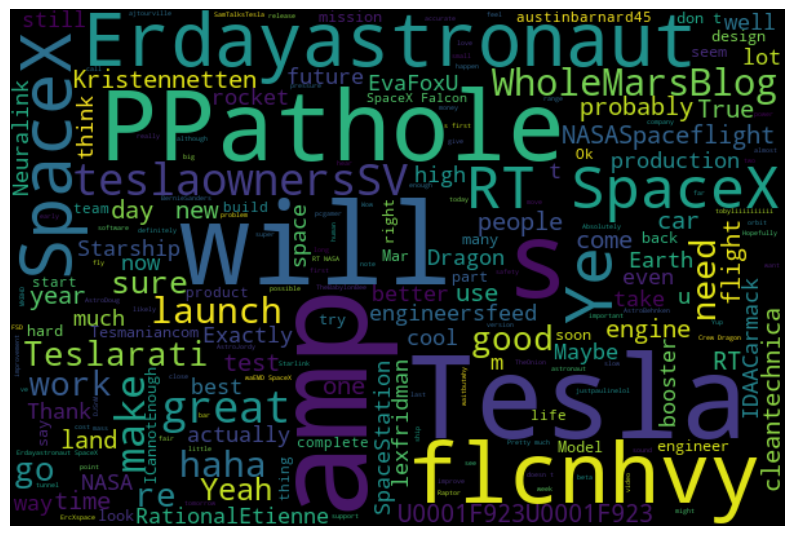

In [25]:
wordcloud = WordCloud(width=600, 
                     height=400, 
                     random_state=2, 
                     max_font_size=100).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

In [26]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

words = nltk.word_tokenize(all_words)
fd = FreqDist(words)


In [27]:
fd.most_common()

[('be', 708),
 ('the', 406),
 ('to', 394),
 ('a', 332),
 ('of', 308),
 ('SpaceX', 238),
 ('amp', 218),
 ('in', 210),
 ('for', 181),
 ('Tesla', 166),
 ('Erdayastronaut', 142),
 ('have', 140),
 ('will', 138),
 ('RT', 127),
 ('on', 126),
 ('PPathole', 123),
 ('I', 116),
 ('but', 115),
 ('flcnhvy', 114),
 ('that', 106),
 ('with', 103),
 ('it', 101),
 ('at', 87),
 ('Yes', 81),
 ('The', 80),
 ('this', 79),
 ('we', 77),
 ('do', 76),
 ('and', 74),
 ('from', 70),
 ('WholeMarsBlog', 68),
 ('as', 66),
 ('you', 65),
 ('teslaownersSV', 62),
 ('This', 61),
 ('make', 61),
 ('Teslarati', 59),
 ('not', 58),
 ('We', 58),
 ('so', 56),
 ('launch', 56),
 ('NASASpaceflight', 55),
 ('more', 52),
 ('need', 50),
 ('great', 47),
 ('just', 47),
 ('work', 45),
 ('should', 44),
 ('than', 44),
 ('all', 43),
 ('can', 42),
 ('go', 42),
 ('or', 40),
 ('out', 40),
 ('Yeah', 40),
 ('cleantechnica', 40),
 ('an', 39),
 ('like', 39),
 ('It\x92s', 38),
 ('get', 38),
 ('would', 37),
 ('about', 37),
 ('It', 36),
 ('no', 36),


In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer


analyzer = SentimentIntensityAnalyzer()

In [29]:
df['polarity'] = df['Text_clean'].apply(lambda x: analyzer.polarity_scores(x))
df.head(10)

,Text,Text_clean,polarity
0,@kunalb11 Im an alien,kunalb11 Im an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,IDAACarmack Ray trace on Cyberpunk with HDR be...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,@joerogan @Spotify Great interview!,joerogan Spotify Great interview,"{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp..."
3,@gtera27 Doge is underestimated,gtera27 Doge be underestimate,"{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'comp..."
4,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China for amaze ...,"{'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compou..."
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox httpstco9WFKMYu2oj,"{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'comp..."
6,"Frodo was the underdoge,\nAll thought he would...",Frodo be the underdoge\nAll think he would fai...,"{'neg': 0.212, 'neu': 0.788, 'pos': 0.0, 'comp..."
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),OwenSparks flcnhvy anonyx10 Haha thank,"{'neg': 0.0, 'neu': 0.353, 'pos': 0.647, 'comp..."
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvy anonyx10 Indeed Tweets definitely do n...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp..."
9,The most entertaining outcome is the most likely,The most entertain outcome be the most likely,"{'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compou..."


In [30]:
df = pd.concat(
    [df.drop(['polarity'], axis=1), 
     df['polarity'].apply(pd.Series)], axis=1)

In [31]:
df.head(10)

,Text,Text_clean,neg,neu,pos,compound
0,@kunalb11 Im an alien,kunalb11 Im an alien,0.000,1.000,0.000,0.0000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,IDAACarmack Ray trace on Cyberpunk with HDR be...,0.000,1.000,0.000,0.0000
2,@joerogan @Spotify Great interview!,joerogan Spotify Great interview,0.000,0.423,0.577,0.6249
3,@gtera27 Doge is underestimated,gtera27 Doge be underestimate,0.423,0.577,0.000,-0.2960
4,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China for amaze ...,0.000,0.670,0.330,0.8126
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox httpstco9WFKMYu2oj,0.000,0.619,0.381,0.5719
6,"Frodo was the underdoge,\nAll thought he would...",Frodo be the underdoge\nAll think he would fai...,0.212,0.788,0.000,-0.5423
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),OwenSparks flcnhvy anonyx10 Haha thank,0.000,0.353,0.647,0.6705
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvy anonyx10 Indeed Tweets definitely do n...,0.000,0.787,0.213,0.4019
9,The most entertaining outcome is the most likely,The most entertain outcome be the most likely,0.000,0.730,0.270,0.3804


In [32]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')
df.head(10)

,Text,Text_clean,neg,neu,pos,compound,sentiment
0,@kunalb11 Im an alien,kunalb11 Im an alien,0.000,1.000,0.000,0.0000,neutral
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,IDAACarmack Ray trace on Cyberpunk with HDR be...,0.000,1.000,0.000,0.0000,neutral
2,@joerogan @Spotify Great interview!,joerogan Spotify Great interview,0.000,0.423,0.577,0.6249,positive
3,@gtera27 Doge is underestimated,gtera27 Doge be underestimate,0.423,0.577,0.000,-0.2960,negative
4,@teslacn Congratulations Tesla China for amazi...,teslacn Congratulations Tesla China for amaze ...,0.000,0.670,0.330,0.8126,positive
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox httpstco9WFKMYu2oj,0.000,0.619,0.381,0.5719,positive
6,"Frodo was the underdoge,\nAll thought he would...",Frodo be the underdoge\nAll think he would fai...,0.212,0.788,0.000,-0.5423,negative
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),OwenSparks flcnhvy anonyx10 Haha thank,0.000,0.353,0.647,0.6705,positive
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,flcnhvy anonyx10 Indeed Tweets definitely do n...,0.000,0.787,0.213,0.4019,positive
9,The most entertaining outcome is the most likely,The most entertain outcome be the most likely,0.000,0.730,0.270,0.3804,positive


In [33]:
import seaborn as sns

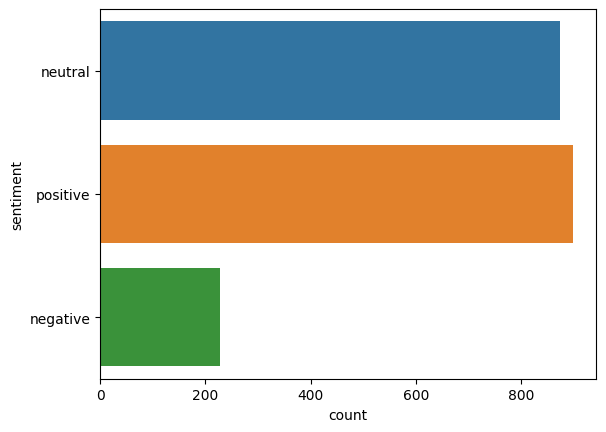

In [34]:
sns.countplot(y='sentiment',data=df)
plt.show()